In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import requests
import json
import quandl
from pprint import pprint
import datetime as dt


{'dataset': {'collapse': None,
             'column_index': None,
             'column_names': ['Date',
                              '1st 20%',
                              '2nd 40%',
                              '3rd 60%',
                              '4th 80%',
                              'Median',
                              'Average',
                              'Units'],
             'data': [['2020-09-30',
                       500000.0,
                       615000.0,
                       725000.0,
                       950000.0,
                       660000.0,
                       855467.0,
                       1579.0],
                      ['2020-08-31',
                       510000.0,
                       625000.0,
                       750000.0,
                       960000.0,
                       680000.0,
                       830097.0,
                       1299.0],
                      ['2020-07-31',
                       490000.0,
       

                      ['1999-01-31',
                       165000.0,
                       190000.0,
                       230000.0,
                       285000.0,
                       210000.0,
                       236198.0,
                       2292.0],
                      ['1998-12-31',
                       165000.0,
                       190000.0,
                       225000.0,
                       265000.0,
                       205000.0,
                       225212.0,
                       2837.0],
                      ['1998-11-30',
                       160000.0,
                       185000.0,
                       220000.0,
                       265000.0,
                       200000.0,
                       220812.0,
                       2898.0],
                      ['1998-10-31',
                       165000.0,
                       190000.0,
                       225000.0,
                       275000.0,
                       205000.

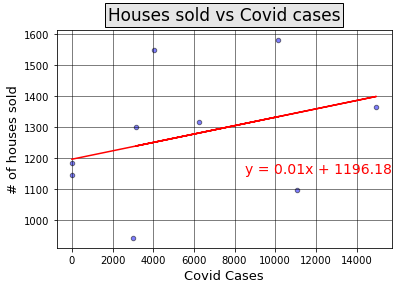

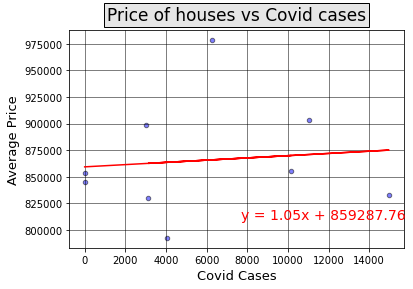

In [2]:
# Import Jupyter Notebook that shows the average house price and number of houses sold in Ontario

%run 1.3.Sold_price_1.ipynb

In [3]:
# Import 2019 dataframe from the notebook and reset index

response_final_2019_sort
response_final_2019 = response_final_2019_sort.reset_index(drop = True)
response_final_2019

,Date,Average,Units
0,01/2019,952417.0,1544.0
1,02/2019,969348.0,1370.0
2,03/2019,822919.0,1090.0
3,04/2019,781375.0,1537.0
4,05/2019,940509.0,1808.0
5,06/2019,907690.0,1315.0
6,07/2019,872848.0,1379.0
7,08/2019,874600.0,1243.0
8,09/2019,840612.0,1355.0
9,10/2019,845374.0,1286.0


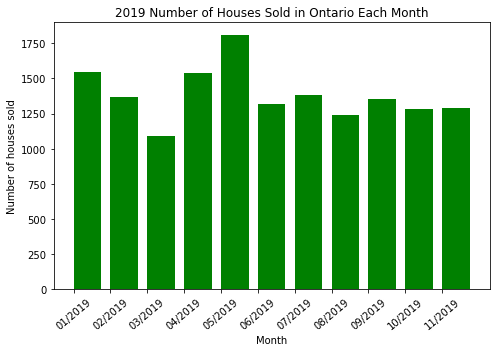

In [4]:
# Create the bar graph for the number of houses sold in Ontario per month in 2019

Date = response_final_2019["Date"]
Y = response_final_2019["Units"]

plt.figure(figsize = (7,5))
plt.bar(Date,Y,color="green", width = 0.75,alpha = 1, align="edge")
plt.xticks(rotation = 40)

plt.title("2019 Number of Houses Sold in Ontario Each Month")
plt.xlabel("Month")
plt.ylabel("Number of houses sold")
plt.tight_layout()
plt.savefig('../3.Pictures/2019 Number of Houses Sold in Ontario Each Month.png')
plt.show()

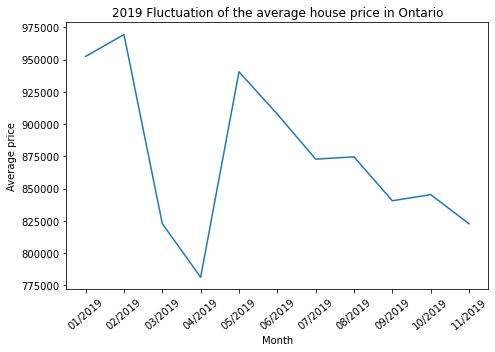

In [5]:
# Generate a line plot to show the house price flutuation in 2019 (before COVID)

Date = response_final_2019["Date"]
Y = response_final_2019["Average"]

plt.figure(figsize = (7,5))
plt.plot(Date, Y)
plt.title("2019 Fluctuation of the average house price in Ontario")
plt.xlabel("Month")
plt.ylabel("Average price")
plt.xticks(rotation = 40)
plt.tight_layout()
plt.savefig('../3.Pictures/2019 Fluctuation of the average house price in Ontario.png')
plt.show()

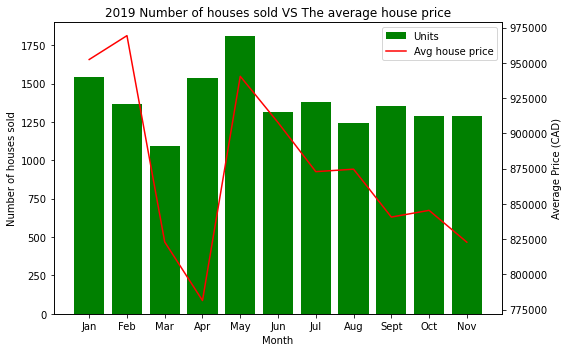

In [6]:
# Plotting 2019 average house price and number of house sold in one graph

fig, ax = plt.subplots(figsize = (8,5))
ax2 = ax.twinx()


ax.bar(response_final_2019.index, response_final_2019["Units"], color="green")
ax2.plot(response_final_2019.index, response_final_2019["Average"], color='red')

plt.title("2019 Number of houses sold VS The average house price")
x_ticks = np.arange(len(response_final_2019["Date"]))
plt.xticks(x_ticks,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov'])

ax.set_ylabel('Number of houses sold')
ax2.set_ylabel('Average Price (CAD)')
ax.set_xlabel('Month')
ax.figure.legend(['Units','Avg house price'], 
                 bbox_to_anchor=(1.,1),loc= 1, bbox_transform=ax.transAxes)

plt.tight_layout()
plt.savefig('../3.Pictures/2019 Number of houses sold VS The average house price.png')
plt.show()

In [7]:
# Compare the 2019 and 2020 indicators
# Import 2020 dataframe from the notebook and reset index

response_final_2020_sort
response_final_2020 = response_final_2020_sort.reset_index(drop = True)
response_final_2020

,Date,Average,Units
0,01/2020,844830.0,1144.0
1,02/2020,853468.0,1184.0
2,03/2020,898243.0,943.0
3,04/2020,832860.0,1365.0
4,05/2020,903186.0,1098.0
5,06/2020,978462.0,1317.0
6,07/2020,792402.0,1547.0
7,08/2020,830097.0,1299.0
8,09/2020,855467.0,1579.0


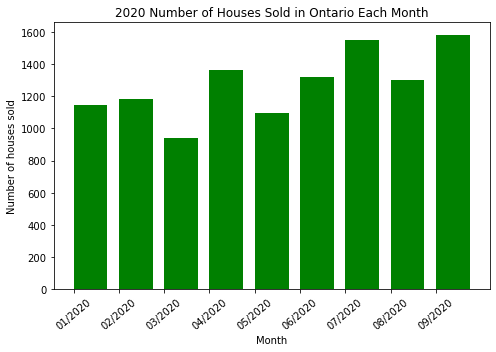

In [8]:
# Create the bar graph for the number of houses sold per month in 2020

Date = response_final_2020["Date"]
Y = response_final_2020["Units"]


plt.figure(figsize = (7,5))
plt.bar(Date,Y,color="green", width = 0.75,alpha = 1, align="edge")
plt.xticks(rotation = 40)

plt.title("2020 Number of Houses Sold in Ontario Each Month")
plt.xlabel("Month")
plt.ylabel("Number of houses sold")

plt.tight_layout()
plt.savefig('../3.Pictures/2020 Number of Houses Sold in Ontario Each Month.png')
plt.show()

# Observation: The number of houses sold in Ontario has not drastically decreased throughout 2020

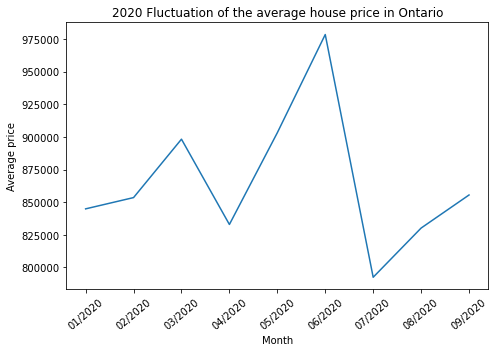

In [9]:
# Generate a line plot to show the average house price flutuations in 2020 (During COVID)

Date = response_final_2020["Date"]
Y = response_final_2020["Average"]

plt.figure(figsize = (7,5))
plt.plot(Date, Y)
plt.title("2020 Fluctuation of the average house price in Ontario")
plt.xlabel("Month")
plt.ylabel("Average price")
plt.xticks(rotation = 40)

plt.tight_layout()
plt.savefig('../3.Pictures/2020 Fluctuation of the average house price in Ontario.png')
plt.show()

# Obsveration: The average price of house decreased between May and July 2020

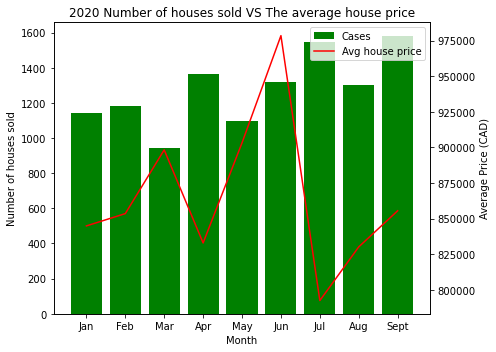

In [10]:
# Plotting 2020 average house price and number of house sold in one graph

fig, ax = plt.subplots(figsize = (7,5))
ax2 = ax.twinx()


ax.bar(response_final_2020.index, response_final_2020["Units"], color="green")
ax2.plot(response_final_2020.index, response_final_2020["Average"], color='red')


x_ticks = np.arange(len(response_final_2020["Date"]))
plt.xticks(x_ticks,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])
plt.title("2020 Number of houses sold VS The average house price")

ax.set_ylabel('Number of houses sold')
ax.set_xlabel('Month')
ax2.set_ylabel('Average Price (CAD)')
ax.figure.legend(['Cases','Avg house price'], 
                 bbox_to_anchor=(1.,1),loc=1, bbox_transform=ax.transAxes)


plt.tight_layout()
plt.savefig('../3.Pictures/2020 Number of houses sold VS The average house price.png')
plt.show()

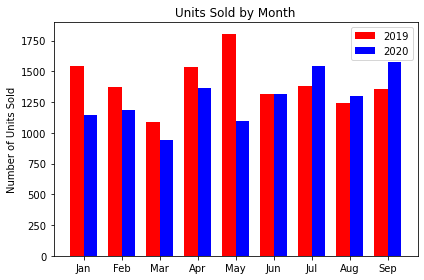

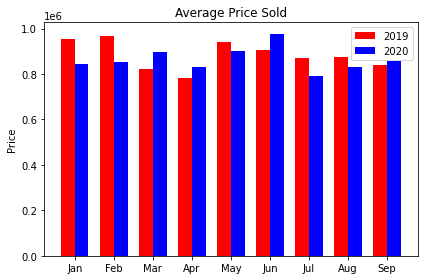

In [11]:
# Import Jupyter Notebook that compares the number of houses sold and average house price in Ontario between 2019 and 2020

%run 1.4.avg_price_avg_units_plots.ipynb

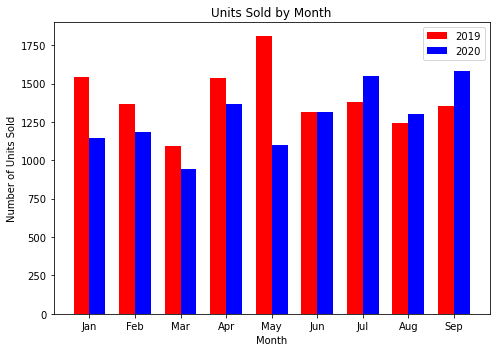

In [12]:
# plot grouped bar chart for "Units sold by Year"

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
x_2019 = reduced_df2019['Units']
x_2020 = df2020['Units']
x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,5))
rects1 = ax.bar(x - width/2, x_2019, width, label='2019', color='red')
rects2 = ax.bar(x + width/2, x_2020, width, label='2020', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Number of Units Sold')
ax.set_xlabel("Month")
ax.set_title('Units Sold by Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
#autolabel(rects1)
#autolabel(rects2)

plt.tight_layout()
plt.savefig('../3.Pictures/Number of houses sold comparison for 2019 and 2020.png')
plt.show()


In [13]:
# Dropping 2 rows to match the 2019 and 2020 data for plotting purpose

Data2019 = response_final_2019.drop([response_final_2019.index[9] , response_final_2019.index[10]])
Data2019

,Date,Average,Units
0,01/2019,952417.0,1544.0
1,02/2019,969348.0,1370.0
2,03/2019,822919.0,1090.0
3,04/2019,781375.0,1537.0
4,05/2019,940509.0,1808.0
5,06/2019,907690.0,1315.0
6,07/2019,872848.0,1379.0
7,08/2019,874600.0,1243.0
8,09/2019,840612.0,1355.0


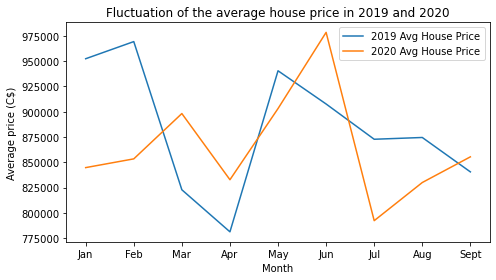

In [14]:
# Use line graph to compare the average price flutations in 2019 and 2020 respectively

fig1 = plt.figure(figsize = (7,4))
ax1 = fig1.add_subplot()

ax1.plot(Data2019['Average'])
ax1.plot(response_final_2020['Average'])
plt.title("Fluctuation of the average house price in 2019 and 2020")
plt.xlabel("Month")
plt.ylabel("Average price (C$)")
plt.xticks(x_ticks,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])
plt.legend(["2019 Avg House Price", "2020 Avg House Price"],loc="upper right")

plt.tight_layout()
plt.savefig("../3.Pictures/Fluctuation of the average house price in 2019 and 2020.png")
plt.show()

In [15]:
# Import Jupyter Notebook that shows the number of covid cases reported in Ontario in 2020

%run 1.2.CSV_CovidCases_ON.ipynb

In [16]:
# Display the data

Reported_cases_per_month_ON

,Number_of_Cases,Date
0,3,01/2020
1,14,02/2020
2,3006,03/2020
3,14970,04/2020
4,11050,05/2020
5,6266,06/2020
6,4061,07/2020
7,3139,08/2020
8,10133,09/2020
9,24627,10/2020


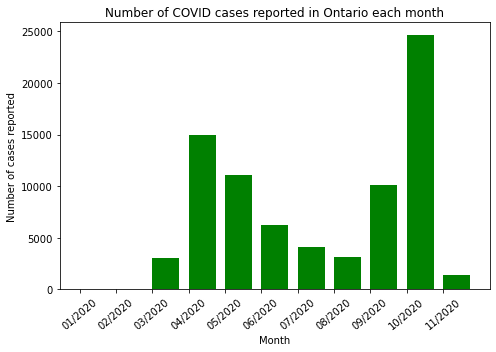

In [17]:
# Create the bar graph for the number of covid cases per month in Ontario in 2020

Date = Reported_cases_per_month_ON["Date"]
Y = Reported_cases_per_month_ON["Number_of_Cases"]


plt.figure(figsize = (7,5))
plt.bar(Date,Y,color="green", width = 0.75,alpha = 1, align="edge")
plt.xticks(rotation = 40)
plt.tight_layout()
plt.title("Number of COVID cases reported in Ontario each month")
plt.xlabel("Month")
plt.ylabel("Number of cases reported")

plt.tight_layout()
plt.savefig('../3.Pictures/Number of COVID cases reported in Ontario each month.png')
plt.show()

# Observation: April and October are the first wave and second wave of the pandemic in Ontario

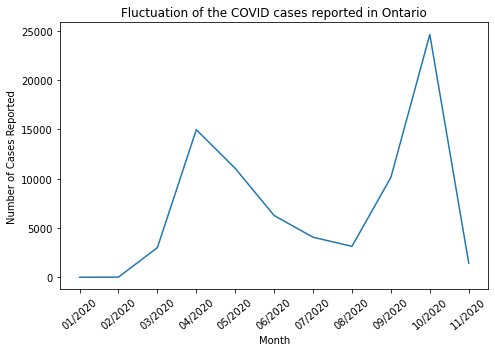

In [18]:
# Generate a line plot to show the reported covid cases fluctuations in Ontario

Date = Reported_cases_per_month_ON["Date"]
Y = Reported_cases_per_month_ON["Number_of_Cases"]

plt.figure(figsize = (7,5))
plt.plot(Date, Y)
plt.title("Fluctuation of the COVID cases reported in Ontario")
plt.xlabel("Month")
plt.ylabel("Number of Cases Reported")
plt.xticks(rotation = 40)

plt.tight_layout()
plt.savefig('../3.Pictures/Fluctuation of the COVID cases reported in Ontario.png')
plt.show()

In [19]:
# Dropping 2 rows to match the 2019 and 2020 data for plotting purpose

CovidCases = Reported_cases_per_month_ON.drop([Reported_cases_per_month_ON.index[9] , Reported_cases_per_month_ON.index[10]])
CovidCases

,Number_of_Cases,Date
0,3,01/2020
1,14,02/2020
2,3006,03/2020
3,14970,04/2020
4,11050,05/2020
5,6266,06/2020
6,4061,07/2020
7,3139,08/2020
8,10133,09/2020


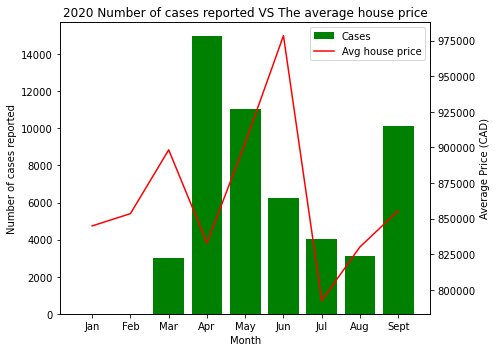

In [20]:
# Plotting 2020 average house price and number of covid cases in one graph

fig, ax = plt.subplots(figsize = (7,5))
ax2 = ax.twinx()

ax.bar(CovidCases.index, CovidCases["Number_of_Cases"], color="green")
ax2.plot(response_final_2020.index, response_final_2020["Average"], color='red')
x_ticks = np.arange(len(response_final_2020["Date"]))
plt.xticks(x_ticks,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])
plt.title("2020 Number of cases reported VS The average house price")


ax.figure.legend(['Cases','Avg house price'], 
                 bbox_to_anchor=(1.,1),loc=1, bbox_transform=ax.transAxes)


ax.set_ylabel('Number of cases reported')
ax.set_xlabel('Month')
ax2.set_ylabel('Average Price (CAD)')

plt.tight_layout()
plt.savefig("../3.Pictures/2020 Number of cases reported VS The average house price.png")
plt.show()

In [21]:
# Import Jupyter Notebook that show the estimated mortgage rate in Ontario between 2019 and 2020

%run 1.5.Interest_rates_emr.ipynb

In [22]:
# Display the data

interest_rate_groupped_df

,Date,Estimated variable mortgage rate
0,01/2019,2.7680
1,01/2020,2.8960
2,02/2019,2.8075
3,02/2020,2.8900
4,03/2019,2.8875
5,03/2020,2.6100
6,04/2019,2.8800
7,04/2020,2.3420
8,05/2019,2.8820
9,05/2020,2.2400


In [23]:
# Locate the rows that show 2019 estimated mortgage rate and reset index for plotting purpose

Rate2019 = interest_rate_groupped_df.iloc[[0,2,4,6,8,10,12,14,16,18]]

MortgageRate2019 = Rate2019.reset_index(drop=True)
MortgageRate2019

,Date,Estimated variable mortgage rate
0,01/2019,2.7680
1,02/2019,2.8075
2,03/2019,2.8875
3,04/2019,2.8800
4,05/2019,2.8820
5,06/2019,2.9000
6,07/2019,2.9000
7,08/2019,2.9000
8,09/2019,2.9000
9,10/2019,2.9000


In [24]:
# Locate the rows that show 2020 estimated mortgage rate and reset index for plotting purpose

Rate2020 = interest_rate_groupped_df.iloc[[1,3,5,7,9,11,13,15,17,19]]

MortgageRate2020 = Rate2020.reset_index(drop=True)
MortgageRate2020

,Date,Estimated variable mortgage rate
0,01/2020,2.8960
1,02/2020,2.8900
2,03/2020,2.6100
3,04/2020,2.3420
4,05/2020,2.2400
5,06/2020,2.1125
6,07/2020,2.0200
7,08/2020,1.9625
8,09/2020,1.9275
9,10/2020,1.8860


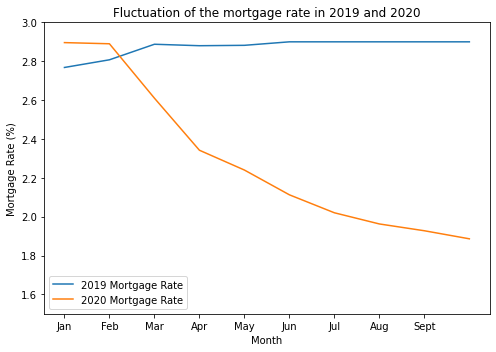

In [25]:
# Create line graph to better compare the changes in estimated mortgage rate in Ontario in 2019 and 2020

fig1 = plt.figure(figsize = (7,5))
ax1 = fig1.add_subplot()

ax1.plot(MortgageRate2019['Estimated variable mortgage rate'])
ax1.plot(MortgageRate2020['Estimated variable mortgage rate'])
plt.title("Fluctuation of the mortgage rate in 2019 and 2020")
plt.xlabel("Month")
plt.ylabel("Mortgage Rate (%)")
plt.xticks(x_ticks,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])
plt.ylim(1.5,3)
plt.legend(["2019 Mortgage Rate", "2020 Mortgage Rate"],loc="lower left")

plt.tight_layout()
plt.savefig('../3.Pictures/Fluctuation of the mortgage rate in 2019 and 2020.png')
plt.show()


# Observation: It is clear to see that the estimated mortgage rate has been adjusted to help the real estate market

{'dataset': {'collapse': None,
             'column_index': None,
             'column_names': ['Date',
                              '1st 20%',
                              '2nd 40%',
                              '3rd 60%',
                              '4th 80%',
                              'Median',
                              'Average',
                              'Units'],
             'data': [['2020-09-30',
                       500000.0,
                       615000.0,
                       725000.0,
                       950000.0,
                       660000.0,
                       855467.0,
                       1579.0],
                      ['2020-08-31',
                       510000.0,
                       625000.0,
                       750000.0,
                       960000.0,
                       680000.0,
                       830097.0,
                       1299.0],
                      ['2020-07-31',
                       490000.0,
       

                       345000.0,
                       420000.0,
                       320000.0,
                       344786.0,
                       3631.0],
                      ['2005-07-31',
                       240000.0,
                       295000.0,
                       345000.0,
                       420000.0,
                       320000.0,
                       353077.0,
                       3312.0],
                      ['2005-06-30',
                       230000.0,
                       285000.0,
                       340000.0,
                       415000.0,
                       310000.0,
                       344460.0,
                       2951.0],
                      ['2005-05-31',
                       240000.0,
                       290000.0,
                       340000.0,
                       410000.0,
                       315000.0,
                       343793.0,
                       3269.0],
                      ['2005-04-30'

                       225000.0,
                       285000.0,
                       200000.0,
                       236880.0,
                       1451.0],
                      ['1993-02-28',
                       160000.0,
                       190000.0,
                       240000.0,
                       300000.0,
                       215000.0,
                       245114.0,
                       1471.0],
                      ['1993-01-31',
                       160000.0,
                       190000.0,
                       235000.0,
                       310000.0,
                       210000.0,
                       249923.0,
                       2140.0],
                      ['1992-12-31',
                       150000.0,
                       180000.0,
                       215000.0,
                       275000.0,
                       195000.0,
                       224787.0,
                       2170.0],
                      ['1992-11-30'

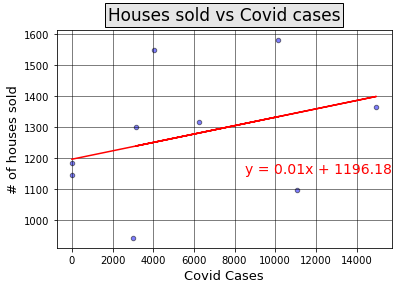

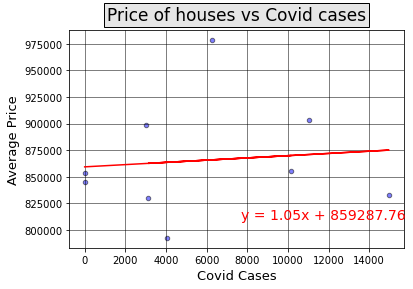

In [26]:
# Import Jupyter Notebook that show the corrleation between covid cases, number of house sold and average house price

%run 1.3.Sold_price_1.ipynb

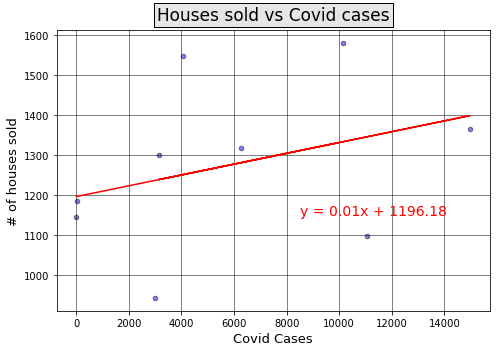

'Correlation coefficient is 0.34.'

In [27]:
# Correlation between the covid cases and number of house sold in Ontario

correlation = st.pearsonr(final_df["Number_of_Cases"], final_df["Units"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")
rounded_cor
slope, intercept, rvalue, pvalue, stderr = linregress (final_df["Number_of_Cases"], final_df["Units"])
x_values = final_df["Number_of_Cases"]
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))

plt.figure(figsize = (7,5))
plt.scatter(x_values, final_df["Units"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.grid(True, color='black', linewidth=0.5)
plt.annotate(eq,(8500,1150),color='red', fontsize=14)
plt.xlabel('Covid Cases', fontsize=13)
plt.ylabel("# of houses sold",fontsize=13)
plt.title('Houses sold vs Covid cases', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')

plt.tight_layout()
plt.savefig('../3.Pictures/Houses sold vs Covid cases.png')
plt.show()
rounded_cor

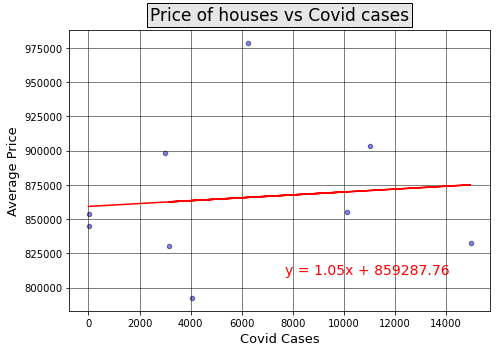

'Correlation coefficient is 0.1.'

In [28]:
# Correlation between the covid cases and average house price in Ontario

correlation = st.pearsonr(final_df["Number_of_Cases"], final_df["Average"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")
rounded_cor
slope, intercept, rvalue, pvalue, stderr = linregress (final_df["Number_of_Cases"], final_df["Average"])
x_values = final_df["Number_of_Cases"]
regress_values = slope * x_values + intercept
eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))

plt.figure(figsize = (7,5))
plt.scatter(x_values, final_df["Average"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.grid(True, color='black', linewidth=0.5)
plt.annotate(eq,(7700,810000),color='red', fontsize=14)
plt.xlabel('Covid Cases', fontsize=13)
plt.ylabel("Average Price",fontsize=13)
plt.title('Price of houses vs Covid cases', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')

plt.tight_layout()
plt.savefig('../3.Pictures/Price of houses vs Covid cases.png')
plt.show()
rounded_cor

{'dataset': {'collapse': None,
             'column_index': None,
             'column_names': ['Date',
                              '1st 20%',
                              '2nd 40%',
                              '3rd 60%',
                              '4th 80%',
                              'Median',
                              'Average',
                              'Units'],
             'data': [['2020-09-30',
                       500000.0,
                       615000.0,
                       725000.0,
                       950000.0,
                       660000.0,
                       855467.0,
                       1579.0],
                      ['2020-08-31',
                       510000.0,
                       625000.0,
                       750000.0,
                       960000.0,
                       680000.0,
                       830097.0,
                       1299.0],
                      ['2020-07-31',
                       490000.0,
       

                       570000.0,
                       420000.0,
                       515112.0,
                       1623.0],
                      ['2011-02-28',
                       310000.0,
                       395000.0,
                       475000.0,
                       605000.0,
                       430000.0,
                       511090.0,
                       1332.0],
                      ['2011-01-31',
                       325000.0,
                       405000.0,
                       490000.0,
                       610000.0,
                       440000.0,
                       512950.0,
                       1524.0],
                      ['2010-12-31',
                       300000.0,
                       370000.0,
                       445000.0,
                       590000.0,
                       405000.0,
                       498178.0,
                       1777.0],
                      ['2010-11-30',
                       305000.0

                       270000.0,
                       195000.0,
                       221443.0,
                       3221.0],
                      ['1997-07-31',
                       155000.0,
                       180000.0,
                       215000.0,
                       270000.0,
                       195000.0,
                       220438.0,
                       3033.0],
                      ['1997-06-30',
                       150000.0,
                       175000.0,
                       210000.0,
                       260000.0,
                       190000.0,
                       216598.0,
                       2304.0],
                      ['1997-05-31',
                       150000.0,
                       175000.0,
                       210000.0,
                       275000.0,
                       190000.0,
                       225065.0,
                       2142.0],
                      ['1997-04-30',
                       150000.0

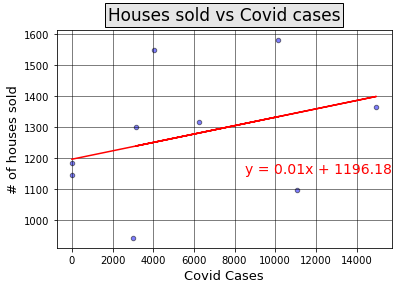

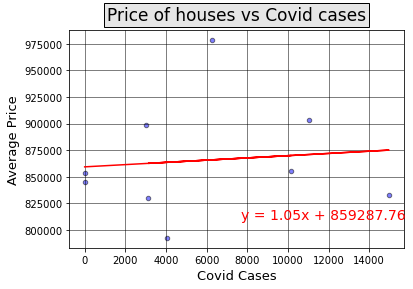

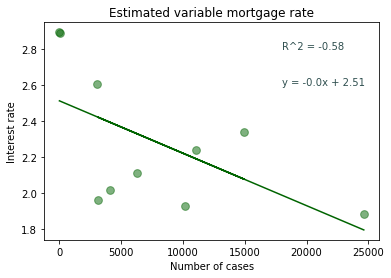

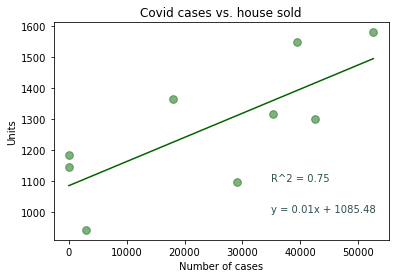

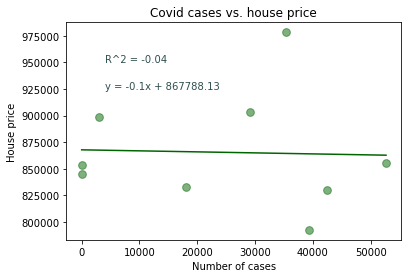

In [29]:
# Import Jupyter Notebook that show the corrleation between covid cases and estimated mortgage

%run 1.6.Scatter_plots_emr.ipynb

<Figure size 504x360 with 0 Axes>

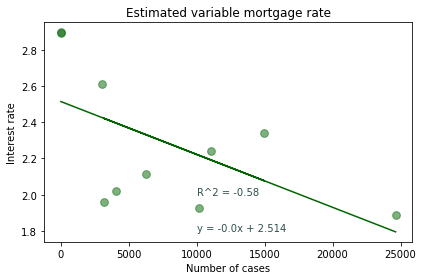

In [30]:
# Correlation between the covid cases and estimated mortgage rate in Ontario in 2020

plt.figure(figsize = (7,5))
combine_df.plot(kind="scatter",x="Number_of_Cases",y="Estimated variable mortgage rate",s=60, c='darkgreen', edgecolors="darkgreen",alpha=0.5)
title = "Estimated variable mortgage rate"
plt.title(title)
correlation_coef = round(st.pearsonr(combine_df['Number_of_Cases'],combine_df['Estimated variable mortgage rate'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))
tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(combine_df['Number_of_Cases'],combine_df['Estimated variable mortgage rate'])
tw_fit = tw_slope * combine_df['Number_of_Cases'] + tw_int
reg_eq = "y = " + str(round(tw_slope,3)) + "x + " +str(round(tw_int,3))

plt.plot(combine_df['Number_of_Cases'],tw_fit,"darkgreen")
plt.annotate(corr_coef,(10000,2), fontsize = 10, color="darkslategrey")
plt.annotate(reg_eq,(10000,1.8), fontsize = 10, color="darkslategrey")
plt.ylabel("Interest rate")
plt.xlabel("Number of cases")

plt.tight_layout()
plt.savefig('../3.Pictures/Estimated variable mortgage rate vs Covid cases.png')
plt.show()